# Reto 01
***Dr. Antonio Arista Jalife***

En este reto vamos a comparar máquinas de soporte vectorial, árboles de decisión y redes neuronales artificiales. Veremos cual es mejor para solucionar un problema. Primero, importamos las librerías. En esta ocasión usaremos "make_classification" en lugar de "make_blobs" para añadirle algo de dificultad a todos los clasificadores.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification 
from sklearn.model_selection import train_test_split

Observa que hace la función "make_classification":

In [2]:
x, y = make_classification(n_samples=1000, n_classes=2, n_features=10)


In [5]:
x

array([[ 0.07457744, -0.12606205, -0.11176625, ..., -0.13528548,
         0.58232805, -1.82338855],
       [-0.87073978, -0.08001831, -0.28492093, ...,  0.70581089,
        -0.54073211, -2.26337187],
       [ 2.03357417,  1.81763234, -1.77605705, ...,  0.19950387,
        -1.65937827, -0.85384916],
       ...,
       [-1.63134556,  0.72552261, -0.01613535, ..., -0.94230938,
        -0.4711435 ,  1.84429691],
       [-2.0002429 , -2.25509248, -0.35344164, ...,  1.6037253 ,
         1.02192482,  0.08663697],
       [-0.67326075,  0.09821415, -0.42815581, ...,  1.43390788,
        -0.69859323,  0.72505085]])

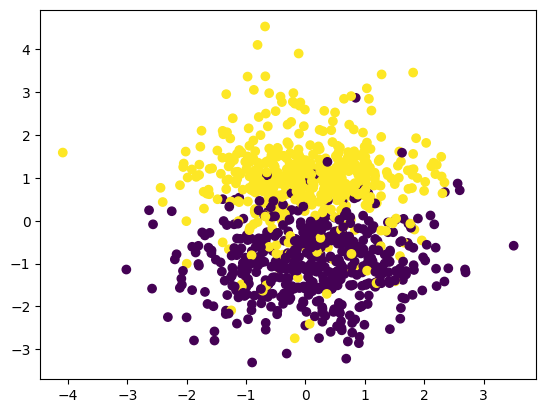

In [13]:
plt.scatter(x[:,0], x[:,1], c=y)
plt.show()


In [7]:

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4)

Como puedes ver, en esta ocasión los puntos se encuentran sumamente revueltos. Ahora los clasificadores pueden tener dificultades para separarlos!

Lo siguiente será utilizar el código de la sesión 02 para evaluar.

In [8]:
from sklearn.metrics import confusion_matrix

def calcularAccuracy(TP, TN, FP, FN):
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    accuracy = accuracy * 100
    return accuracy
def calcularSensibilidad(TP, TN, FP, FN):
    sensibilidad = TP / (TP + FN)
    sensibilidad = sensibilidad * 100
    return sensibilidad
def calcularEspecificidad(TP, TN, FP, FN):
    especificidad = TN / (TN + FP)
    especificidad = especificidad * 100
    return especificidad

def evaluar(y_test, y_pred):
    resultado = confusion_matrix(y_test, y_pred)
    print(resultado)
    (TN, FP, FN, TP) = resultado.ravel()
    print("True positives: "+str(TP))
    print("True negatives: "+str(TN))
    print("False positives: "+str(FP))
    print("False negative: "+str(FN))

    acc = calcularAccuracy(TP, TN, FP, FN)
    sen = calcularSensibilidad(TP, TN, FP, FN)
    spec = calcularEspecificidad(TP, TN, FP, FN)
    print("Precision:"+str(acc)+"%")
    print("Sensibilidad:"+str(sen)+"%")
    print("Especificidad:"+str(spec)+"%")

## Redes Neuronales Artificiales: 

In [9]:
from sklearn.neural_network import MLPClassifier
NeuralNetwork = MLPClassifier(hidden_layer_sizes=(10,4),
                            max_iter=20000,
                            activation ='logistic',
                            tol= 1e-8)

NeuralNetwork.fit(x_train, y_train)
y_pred_nn = NeuralNetwork.predict(x_test)

c:\Users\alonso.sandoval\Anaconda3\envs\bedu_ml\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [10]:
evaluar(y_test, y_pred_nn)

[[192  19]
 [ 34 155]]
True positives: 155
True negatives: 192
False positives: 19
False negative: 34
Precision:86.75%
Sensibilidad:82.01058201058201%
Especificidad:90.99526066350711%


# Random Forests:

In [11]:
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier(n_estimators = 800)
RandomForest.fit(x_train, y_train)
y_pred_rfc = RandomForest.predict(x_test)

In [12]:
evaluar(y_test, y_pred_rfc)

[[205   6]
 [  8 181]]
True positives: 181
True negatives: 205
False positives: 6
False negative: 8
Precision:96.5%
Sensibilidad:95.76719576719577%
Especificidad:97.1563981042654%


In [ ]:
RandomForestClassifier()

# Búsqueda de hiperparámetros con GridSearchCV

In [15]:
from sklearn.model_selection import GridSearchCV
params = {
    "max_depth": [10,15,20,25],
    "min_samples_split": [3,4,5,6],
    "max_features": [7,8,9,10]
}
bosque = RandomForestClassifier(n_estimators = 800)
cl_gs = GridSearchCV(bosque, params, verbose = 2)
cl_gs.fit(x_train, y_train)


Fitting 5 folds for each of 64 candidates, totalling 320 fits


[CV] END ..max_depth=10, max_features=7, min_samples_split=3; total time=  20.8s
[CV] END ..max_depth=10, max_features=7, min_samples_split=3; total time=  20.3s
[CV] END ..max_depth=10, max_features=7, min_samples_split=3; total time=  19.7s
[CV] END ..max_depth=10, max_features=7, min_samples_split=3; total time=  21.4s
[CV] END ..max_depth=10, max_features=7, min_samples_split=3; total time=  18.7s
[CV] END ..max_depth=10, max_features=7, min_samples_split=4; total time=  19.9s
[CV] END ..max_depth=10, max_features=7, min_samples_split=4; total time=  22.3s
[CV] END ..max_depth=10, max_features=7, min_samples_split=4; total time=  21.1s
[CV] END ..max_depth=10, max_features=7, min_samples_split=4; total time=  22.6s
[CV] END ..max_depth=10, max_features=7, min_samples_split=4; total time=  25.1s
[CV] END ..max_depth=10, max_features=7, min_samples_split=5; total time=  20.2s
[CV] END ..max_depth=10, max_features=7, min_samples_split=5; total time=  23.4s
[CV] END ..max_depth=10, max

GridSearchCV(estimator=RandomForestClassifier(n_estimators=800),
             param_grid={'max_depth': [10, 15, 20, 25],
                         'max_features': [7, 8, 9, 10],
                         'min_samples_split': [3, 4, 5, 6]},
             verbose=2)

In [16]:
72/320

0.225

In [17]:
cl_gs.best_score_

0.9416666666666667